**Project (Classification model) on  Stroke Predicition**

In [ ]:
#import required library
import numpy as np #for numerical calculation
import pandas as pd #for data analysis
import matplotlib.pyplot as plt #for visualization
import seaborn as sns #for visualization
import warnings #to ignore warning
warnings.filterwarnings('ignore')

**Importing data set**

In [ ]:
# read data set
df = pd.read_csv('/content/healthcare-dataset-stroke-data.csv')
df.head()


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


**Data Structure**

In [ ]:
df.shape # size of the data

(5110, 12)

In [ ]:
df.columns # column names


Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

**Data Summary**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [ ]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [ ]:
df.corr() # correlation

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
id,1.000000,0.003538,0.003550,-0.001296,0.001092,0.003084,0.006388
age,0.003538,1.000000,0.276398,0.263796,0.238171,0.333398,0.245257
hypertension,0.003550,0.276398,1.000000,0.108306,0.174474,0.167811,0.127904
heart_disease,-0.001296,0.263796,0.108306,1.000000,0.161857,0.041357,0.134914
avg_glucose_level,0.001092,0.238171,0.174474,0.161857,1.000000,0.175502,0.131945
bmi,0.003084,0.333398,0.167811,0.041357,0.175502,1.000000,0.042374
stroke,0.006388,0.245257,0.127904,0.134914,0.131945,0.042374,1.000000


**Data Cleaning**

In [ ]:
df.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

**Handling Missing Values / null values**

In [ ]:
df.bmi.fillna(df.bmi.mean(),inplace=True)

In [ ]:
df.isna().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

**Separating categorical and numerical variable**

In [ ]:
numeric_columns=df[['age','avg_glucose_level','bmi']]
categorical_columns=df[['gender', 'hypertension', 'heart_disease', 'ever_married','work_type', 'Residence_type',
                       'smoking_status', 'stroke']]

**Correlation Heatmap of Selected Numerical Features**

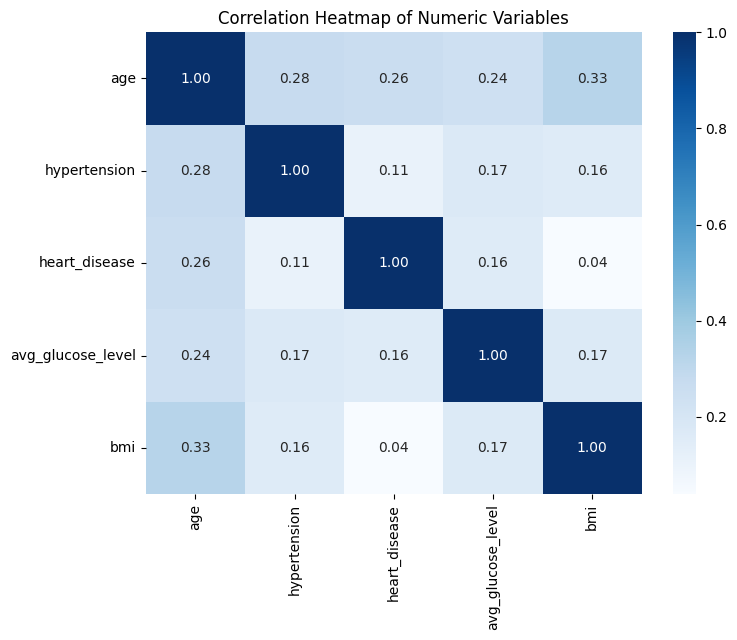

In [ ]:
# Correlation heatmap for numeric variables
numeric_columns = ['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi']
numeric_data = df[numeric_columns]

corr_matrix = numeric_data.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, cmap='Blues', annot=True, fmt=".2f")
plt.title('Correlation Heatmap of Numeric Variables')
plt.show()

**droping the id  column**

In [ ]:
df.drop(['id'], axis=1, inplace=True)

**Visualizing Data Distributions: Histograms with KDE for 'Age' and 'Average Glucose Level' Columns**

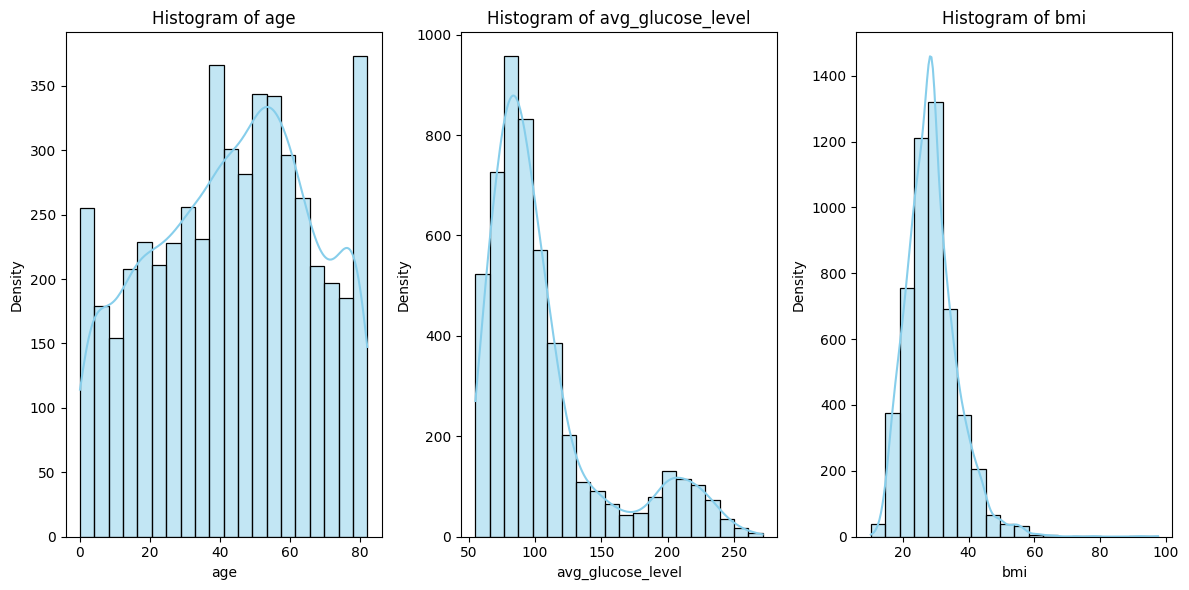

In [ ]:
#creating 'numeric_columns' contains the list of numeric column names
numeric_columns = ['age', 'avg_glucose_level', 'bmi']
numeric_data = df[numeric_columns]

# Generate histograms for numeric columns
plt.figure(figsize=(12, 6))

for i, column in enumerate(numeric_data.columns, 1):
    plt.subplot(1, 3, i)
    sns.histplot(numeric_data[column].dropna(), bins=20, kde=True, color='skyblue', edgecolor='black')
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Density')

plt.tight_layout()
plt.show()




**checking the outliers in numerical columns**

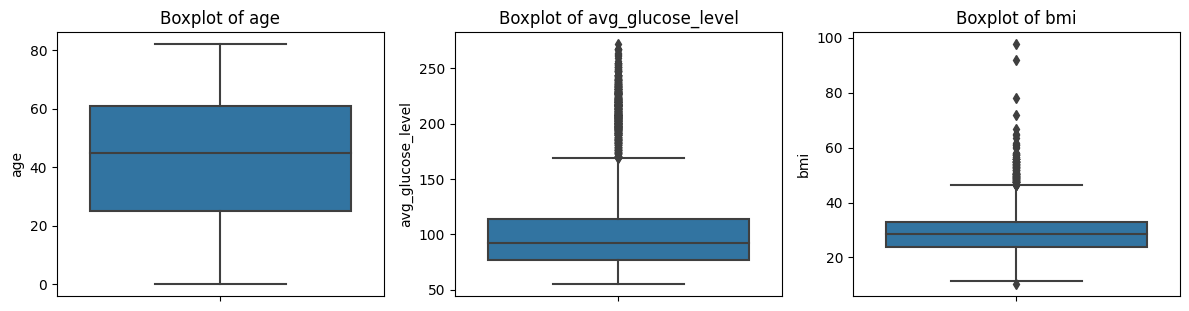

In [ ]:
# Create a figure to contain the boxplots
numeric_columns = ['age', 'avg_glucose_level', 'bmi']
numeric_data = df[numeric_columns]
plt.figure(figsize=(12, 6))

# Generate boxplots for each numeric column
for i, column in enumerate(numeric_data.columns, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=df[column])
    plt.title(f'Boxplot of {column}')
    plt.ylabel(column)

# Adjust the layout for better visualization
plt.tight_layout()
plt.show()


**Remove outliers using IQR method**

In [ ]:
# Define the numeric columns with outliers
columns_with_outliers = ['bmi', 'avg_glucose_level']

# Remove outliers using IQR method
for column in columns_with_outliers:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    # Filtering criteria to remove outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Remove outliers from the DataFrame
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]


**check box plot for numerical columns after removal**

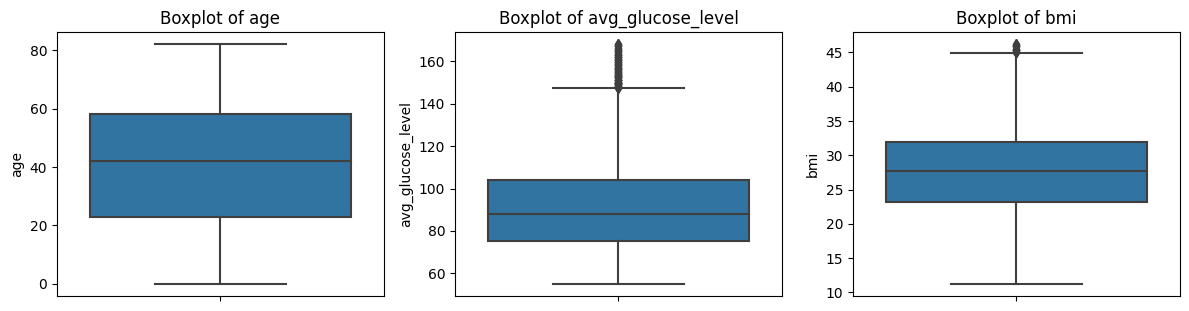

In [ ]:
# Create a figure to contain the boxplots
numeric_columns = ['age', 'avg_glucose_level', 'bmi']
numeric_data = df[numeric_columns]
plt.figure(figsize=(12, 6))

# Generate boxplots for each numeric column
for i, column in enumerate(numeric_data.columns, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=df[column])
    plt.title(f'Boxplot of {column}')
    plt.ylabel(column)

# Adjust the layout for better visualization
plt.tight_layout()
plt.show()

**Creating Bar Charts for Various Categorical Variables in the Dataset**

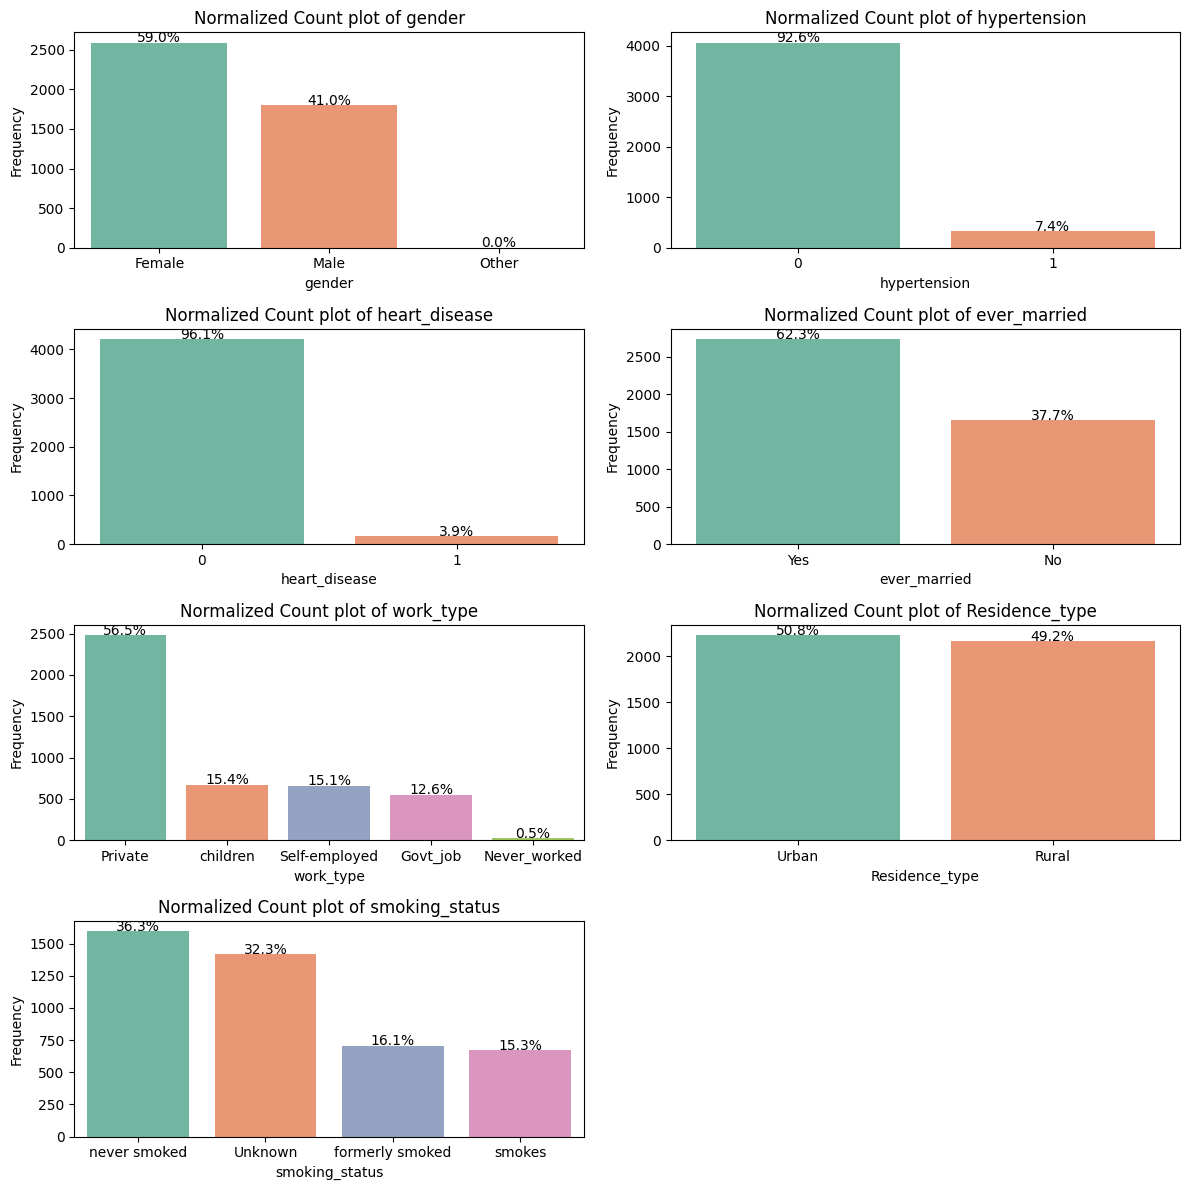

In [ ]:
# Bar charts for categorical variables
df_categorical = ['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

plt.figure(figsize=(12, 12))

for i, column in enumerate(df_categorical, 1):
    plt.subplot(4, 2, i)
    total = float(len(df[column]))
    sns.countplot(x=column, data=df, palette='Set2', order=df[column].value_counts().index)
    plt.title(f'Normalized Count plot of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

    for p in plt.gca().patches:
        height = p.get_height()
        plt.text(p.get_x() + p.get_width() / 2., height + 2, f'{height / total:.1%}', ha='center')

plt.tight_layout()
plt.show()




**Mapping Categorical Values to Numerical Columns in DataFrame Columns**

In [ ]:
gender_mapping = {'Male': 0, 'Female': 1, np.nan : 2}
ever_married_mapping = {'No': 0, 'Yes': 1, np.nan : 2}
work_type_mapping = {'Never_worked': 0, 'Govt_job': 1, 'Self-employed': 2, 'children' : 3, 'Private' : 4, np.nan : 5}
Residence_type_mapping = {'Rural': 0, 'Urban': 1, np.nan : 2}
smoking_status_mapping = {'smokes': 0, 'formerly smoked': 1, 'unknown': 2, 'never smoked' : 3, np.nan : 4}

df['gender'] = df['gender'].map(gender_mapping)
df['ever_married'] = df['ever_married'].map(ever_married_mapping)
df['work_type'] = df['work_type'].map(work_type_mapping)
df['Residence_type'] = df['Residence_type'].map(Residence_type_mapping)
df['smoking_status'] = df['smoking_status'].map(smoking_status_mapping)
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
2,0.0,80.0,0,1,1,4,0,105.92,32.500000,3.0,1
6,0.0,74.0,1,1,1,4,0,70.09,27.400000,3.0,1
7,1.0,69.0,0,0,0,4,1,94.39,22.800000,3.0,1
8,1.0,59.0,0,0,1,4,0,76.15,28.893237,NaN,1
9,1.0,78.0,0,0,1,4,1,58.57,24.200000,NaN,1


In [ ]:
marks_list = df['gender'].tolist()

marks_list

[0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0

**Defining Features and Target Variable**

In [ ]:
features = ["age",'hypertension', 'heart_disease', 'ever_married', 'work_type']
X = df[features]
Y = df['stroke']
#Train-Test Split:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

**Random Forest Classifier Training**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

rf_classifier.fit(X_train, Y_train)

RandomForestClassifier(random_state=42)

**Model Performance Evaluation Metrics**

In [ ]:
Y_pred = rf_classifier.predict(X_test)
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

accuracy = accuracy_score(Y_test, Y_pred)
confusion = confusion_matrix(Y_test, Y_pred)
classification_rep = classification_report(Y_test, Y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", confusion)
print("Classification Report:\n", classification_rep)

Accuracy: 0.9544419134396356
Confusion Matrix:
 [[836   4]
 [ 36   2]]
Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98       840
           1       0.33      0.05      0.09        38

    accuracy                           0.95       878
   macro avg       0.65      0.52      0.53       878
weighted avg       0.93      0.95      0.94       878



**USER_INPUT FOR STROKE PREDICTION**

In [ ]:
print("\nPlease provide the following details for stroke prediction:")
user_age = float(input("Enter age: "))
user_hypertension = int(input("Enter hypertension (0 for No, 1 for Yes): "))
user_heart_disease = int(input("Enter heart disease (0 for No, 1 for Yes): "))
user_ever_married = int(input("Enter marital status (0 for No, 1 for Yes): "))
user_work_type = int(input("Enter work type (0-Never worked, 1-Govt job, 2-Self-employed, 3-Children, 4-Private): "))

user_data = np.array([[user_age, user_hypertension, user_heart_disease, user_ever_married, user_work_type]])

# Predicting stroke based on user input
predicted_stroke = rf_classifier.predict(user_data)

if predicted_stroke[0] == 1:
    print("The prediction indicates a likelihood of stroke.")
else:
    print("The prediction suggests no significant likelihood of stroke.")


Please provide the following details for stroke prediction:
Enter age: 56
Enter hypertension (0 for No, 1 for Yes): 1
Enter heart disease (0 for No, 1 for Yes): 1
Enter marital status (0 for No, 1 for Yes): 1
Enter work type (0-Never worked, 1-Govt job, 2-Self-employed, 3-Children, 4-Private): 3
The prediction suggests no significant likelihood of stroke.


In [ ]:
# Mapping for user input
gender_mapping = {'Male': 0, 'Female': 1, np.nan: 2}
ever_married_mapping = {'No': 0, 'Yes': 1, np.nan: 2}
work_type_mapping = {'Never_worked': 0, 'Govt_job': 1, 'Self-employed': 2, 'children': 3, 'Private': 4, np.nan: 5}
residence_type_mapping = {'Rural': 0, 'Urban': 1, np.nan: 2}
smoking_status_mapping = {'smokes': 0, 'formerly smoked': 1, 'unknown': 2, 'never smoked': 3, np.nan: 4}

# User input
user_age = float(input("Enter age: "))
user_gender = input("Enter gender (Male/Female): ")
user_hypertension = int(input("Enter hypertension (0 for No, 1 for Yes): "))
user_heart_disease = int(input("Enter heart disease (0 for No, 1 for Yes): "))
user_ever_married = input("Enter marital status (Yes/No): ")
user_work_type = input("Enter work type (Never_worked/Govt_job/Self-employed/Children/Private): ")
user_residence_type = input("Enter residence type (Rural/Urban): ")
user_smoking_status = input("Enter smoking status (smokes/formerly smoked/unknown/never smoked): ")

# Map user input to numerical values
user_gender = gender_mapping.get(user_gender, 2)  # Default to 2 (unknown) if input not recognized
user_ever_married = ever_married_mapping.get(user_ever_married, 2)
user_work_type = work_type_mapping.get(user_work_type, 5)  # Default to 5 (unknown) if input not recognized
user_residence_type = residence_type_mapping.get(user_residence_type, 2)
user_smoking_status = smoking_status_mapping.get(user_smoking_status, 4)  # Default to 4 (unknown) if input not recognized

# Create user data array
user_data = np.array([[user_age, user_gender, user_hypertension, user_heart_disease, user_ever_married,
                      user_work_type, user_residence_type, user_smoking_status]])

# Predicting stroke based on user input
predicted_stroke = rf_classifier.predict(user_data)

if predicted_stroke[0] == 1:
    print("The prediction indicates a likelihood of stroke.")
else:
    print("The prediction suggests no significant likelihood of stroke.")


**THANK YOU**